In [19]:
# pip install sklearn

In [20]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [21]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [22]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [23]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [24]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [25]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [26]:
predictions[0:5]

array([ 59.86519623,  60.8659135 , 107.23961054, 184.19068748,
       121.07968517])

Text(0, 0.5, 'Predictions')

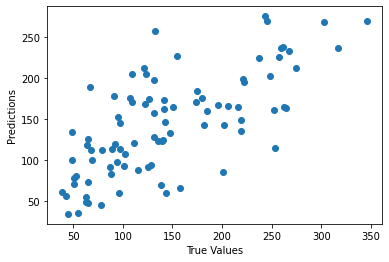

In [27]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [28]:
import numpy as np

In [29]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.41272362590767
Train RMSE: 53.69607873484818


# Cross Validation

In [30]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [31]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [32]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


### LOOCV

In [33]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [34]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [35]:
# Perform 6-fold cross validation
y = diabetes.target # define the target variable (dependent variable) as y

# has scoring for geting a function instead of R2 ...
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.45548694 0.46138022 0.40094331 0.55220826 0.43941841 0.56923477]


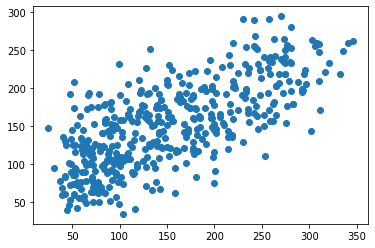

In [36]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

In [37]:
predictions

array([204.74070666,  66.83160114, 175.60380801, 165.81819524,
       128.83667082, 103.06142355,  77.5027185 , 125.41937649,
       161.76409613, 209.59074316,  98.58316048, 102.25371483,
       114.30937876, 161.82198048, 100.50344914, 176.55405999,
       206.58907978, 184.35515374, 147.83016413, 121.98478321,
       119.64308071,  89.72382166, 117.35357098, 251.99477052,
       164.0176025 , 146.86958626,  95.41599801, 178.88382566,
       127.20259633, 179.54771253, 159.81819066,  67.84426825,
       259.66011891, 105.57274523,  78.43552002,  83.11457912,
       203.1063774 , 154.06469746, 240.74270881, 137.17941026,
       158.32375928,  72.81408347, 145.48083736,  78.96262521,
       218.96391315, 125.73258404, 141.3148845 , 107.95369672,
        72.54494649, 192.84552007, 157.23820324, 171.00379528,
       134.06295002, 158.09470573, 139.10228036,  71.70983504,
       208.28707533,  77.67773472, 102.08159383, 135.69891125,
       113.41761822, 184.40143104,  61.37629689,  96.75

In [38]:
np.sqrt(mean_squared_error(y,predictions))

54.76350523390499

# Feature Scaling

In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head() 

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [40]:
y = data['Value']

In [41]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [42]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [44]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [45]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.448276,0.541667,0.553191,0.214286
1,0.172414,0.458333,0.595745,0.112245
2,0.551724,0.312500,0.276596,0.183673
3,0.241379,0.479167,0.638298,0.051020
4,0.344828,0.375000,0.404255,0.153061
...,...,...,...,...
14320,0.344828,0.687500,0.702128,0.183673
14321,0.517241,0.395833,0.361702,0.224490
14322,0.103448,0.208333,0.361702,0.346939
14323,0.344828,0.416667,0.404255,0.081633


In [46]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.241379,0.625000,0.702128,0.132653
1,0.379310,0.479167,0.446809,0.142857
2,0.517241,0.562500,0.531915,0.173469
3,0.241379,0.541667,0.638298,0.163265
4,0.103448,0.229167,0.510638,0.275510
...,...,...,...,...
3577,0.206897,0.229167,0.361702,0.285714
3578,0.034483,0.270833,0.702128,0.551020
3579,0.241379,0.520833,0.595745,0.040816
3580,0.275862,0.520833,0.574468,0.142857


### Standard Scaler

In [47]:
from sklearn.preprocessing import StandardScaler
# todo: remember

In [48]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [49]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.841812,0.835319,0.434953,0.136944
1,-0.873789,0.259978,0.760155,-0.483305
2,1.485163,-0.746869,-1.678858,-0.049131
3,-0.444889,0.403813,1.085356,-0.855454
4,0.198462,-0.315363,-0.703253,-0.235205
...,...,...,...,...
14320,0.198462,1.842166,1.573159,-0.049131
14321,1.270713,-0.171528,-1.028454,0.198969
14322,-1.302689,-1.466045,-1.028454,0.943267
14323,0.198462,-0.027693,-0.703253,-0.669379


In [50]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,-0.444889,1.410660,1.573159,-0.359255
1,0.412912,0.403813,-0.378051,-0.297230
2,1.270713,0.979154,0.272352,-0.111155
3,-0.444889,0.835319,1.085356,-0.173180
4,-1.302689,-1.322210,0.109751,0.509093
...,...,...,...,...
3577,-0.659339,-1.322210,-1.028454,0.571118
3578,-1.731590,-1.034539,1.573159,2.183764
3579,-0.444889,0.691484,0.760155,-0.917479
3580,-0.230438,0.691484,0.597554,-0.297230


# tasks

###### try applying this scalers to any dataset and check the regression results

In [51]:
# your code here

# One Hot Encoding

In [52]:
data = pd.read_csv('regression.csv')

In [53]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [54]:
pd.get_dummies(data[['Age', 'Club']])

,Age,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,...,Club_Wycombe Wanderers,Club_Yeni Malatyaspor,Club_Yeovil Town,Club_Yokohama F. Marinos,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Çaykur Rizespor,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17904,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17905,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# tasks

###### try applying OHE to any column(s) and check the regression results

In [55]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_csv('regression.csv')

value = data.Value
data = data.drop(columns=["Value"])




In [56]:
data["Jersey Number"] = data["Jersey Number"].map(str)
# data = pd.get_dummies(data[["Name", "Nationality", "Club", "Wage", "Position", "Height", "Weight", "Jersey Number"]])
data = pd.get_dummies(data[['Jersey Number', 'Club', "Age"]])



In [57]:
norm = StandardScaler().fit(data)
data_scaled = pd.DataFrame(columns = data.columns, data = norm.transform(data))

In [58]:
# create training and testing vars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, value, test_size=0.2)
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:5]


array([-1189599.98395404,   840416.01604596,  2619872.01604596,
        2397088.01604596,  3649088.01604596])

In [59]:
# create training and testing vars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, value, test_size=0.2)
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:5]


array([3750192.,  763152., 6306304., 1780496., 3023840.])

Cross-validated scores: [-6.74873306e-01 -3.37507906e+27 -1.31427450e+02 -4.96659786e+02
 -1.11877193e+03 -2.51858791e+31]


1.4469969199994808e+18

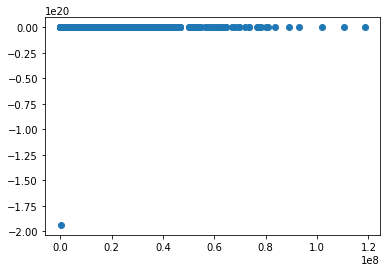

In [64]:
data = data_scaled
predictions = cross_val_predict(model, data, value, cv=10)

scores = cross_val_score(model, data, value, cv=6)

print ('Cross-validated scores:', scores)

plt.scatter(value, predictions)

np.sqrt(mean_squared_error(value,predictions))

# todo check with cross val r2 how good/bad it became